<a href="https://colab.research.google.com/github/MayurdhvajsinhJadeja/ML/blob/main/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#import dataset
dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ex2data1.csv")
dataset

,X,Y,Result
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
...,...,...,...
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1


In [ ]:
dataset.shape

(100, 3)

In [ ]:
dataset.describe()

,X,Y,Result
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


In [ ]:
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [ ]:
#Hypothesis Function
def sigmoid(p):
  return (1/(1+np.exp(-p)))

In [ ]:
sigmoid(9)

0.9998766054240137

In [ ]:
def featurenormalization(x):
  mean=np.mean(x,axis=0)
  std=np.std(x,axis=0)
  x_norm=(x-mean)/std
  return x_norm,mean,std


In [ ]:
def costfunction(theta,x,y):
  m=len(y)
  diff=0
  grad=0
  p_value=[]
  for i in range(m):
    predict_value=sigmoid(np.dot(x[i],theta))
    diff=diff+(-y[i]*np.log(predict_value)-((1-y[i])*np.log(1-predict_value)))
    p_value.append(predict_value)
  grad=(1/m)*np.dot(x.transpose(),(p_value)-y)
  cost=(1/m)*diff
  return cost,grad

In [ ]:
def gradientdecent(theta,x,y,alpha,num_iters):
  cost_values=[]
  for i in range(num_iters):
    cost,grad=costfunction(theta,x,y)
    theta=theta-(alpha*grad)
    cost_values.append(cost)
  return theta,cost_values

In [ ]:
#feature normalization block
m,n=x.shape[0],x.shape[1]
x,x_mean,x_std=featurenormalization(x)
x=np.append(np.ones((m,1)),x,axis=1)
y=y.reshape(m,1)


In [ ]:
#training process
initial_theta=np.zeros((n+1,1))
cost,grad=costfunction(initial_theta,x,y)
#print(initial_theta)

In [ ]:
grad

array([[-0.1       ],
       [-0.28122914],
       [-0.25098615]])

In [ ]:
theta,cost_values=gradientdecent(initial_theta,x,y,0.5,800)

Text(0.5, 1.0, 'cost function curve')

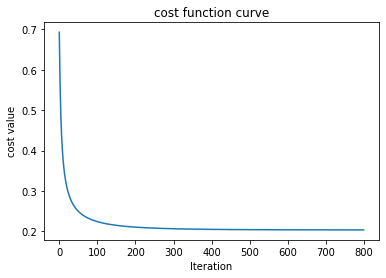

In [ ]:
plt.plot(cost_values)
plt.xlabel("Iteration")
plt.ylabel("cost value")
plt.title("cost function curve")